# (1) Data Description

- ### "players" (untidied data, only using this set)
  - 196 rows, each a unique player
  - 7 columns

| Variable | Type | Description | Summary | Example |
| :------ | :-- | :--------- | :-----: | :-----: |
||||||
| **Experience** | *character* | - *Beginner* - I'm completely new to Minecraft. |35|Beginner|
||| - *Amateur* - I've played a few hours of Minecraft.|63|Amateur|
| | |- *Regular* - I regularly play Minecraft.|36|Regular|
| | |- *Pro* - I am an experienced and pro Minecraft Player.|14|Pro|
| | |- *Veteran* - Been here since the old days. (Before 2015)|48|Veteran|
|**subscribe** | *logical*|subscribed to newsletter?|144 - TRUE / 52 - FALSE|TRUE/FALSE|
| **hashedEmail** |*character*| player's hashed out email.|NA|f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d|
|**played_hours**| *double*| total amount of hours played on PLAICraft. |~5.85 hours|30.3|
|**name**| *character*| player's name|NA|Morgan|
|**gender**| *character*| player's gender|124 Male, 37 Female, 15 Non-binary, 11 prefer not to say, 9 other|Male|
|**Age**|*double*| player's age|~21.14 years|9|
||||||

### Issues in the data
- Tidyness
 - Titles, Age is capitalized when no others are, hashedEmail, should have an underscore separator.
  - hashedEmail is hard to read as an identifier

### Data Collection
- Age, gender, experience, hashedEmail, name, subscribe collected from form filled out before playing PLAICraft
- played_hours collected from persons' total sessions played
- Data is collected from recording gameplay, speech, and key presses in the PLAICraft Minecraft browser window

## Question 2
#### We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

***Can age, gender, and experience be used to predict played_hours?***

### Why will the data help?
- Age (numeric)
  - Younger people play more video games
  - Older people (50+) generally aren't as interested in video games
  - I believe there will be a negative relationship between age and played_hours (younger=more hours, older=less hours)
- gender (categorical)
  - The average male plays more video games than other genders
- experience (categorical)
  - more experienced players may die in the game less, and be encouraged to play more
- excluded subscribe because large number of people subscribed, making it less useful predictor.
 

### Plan to wrangle?
- Standardize (dbl - age, played_hours)
- Use as.factor (chr - experience, gender)
- Use only Male, Female, Non-binary, for simplicity
- Remove NA values for age

In [103]:
library(tidyverse)
library(GGally)
library(repr)
library(tidymodels)
library(janitor)
library(cowplot)

P_URL <- "https://raw.githubusercontent.com/GraySchi/ds_project/refs/heads/main/players.csv"
P_destfile <- "players_data.csv"
download.file(P_URL, P_destfile)
S_URL <- "https://raw.githubusercontent.com/GraySchi/ds_project/refs/heads/main/sessions.csv"
S_destfile <- "sessions_data.csv"
download.file(S_URL, S_destfile)

players <- read_csv(file = "players_data.csv") |>
    clean_names()
sessions <- read_csv(file = "sessions_data.csv")
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


✔ loaded into R

In [104]:
players_wrangled <- players |>
    select(played_hours, age, gender, experience) |>
    filter(gender == "Male" | gender == "Female" | gender == "Non-binary") |>
    filter(!is.na(age)) |>
    mutate(gender = as.factor(gender)) |>
    mutate(experience = as.factor(experience))
summary(players)
mean_values <- tibble(mean_age = c(21.14), mean_played_hours = c(5.85))
mean_values

  experience        subscribe       hashed_email        played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


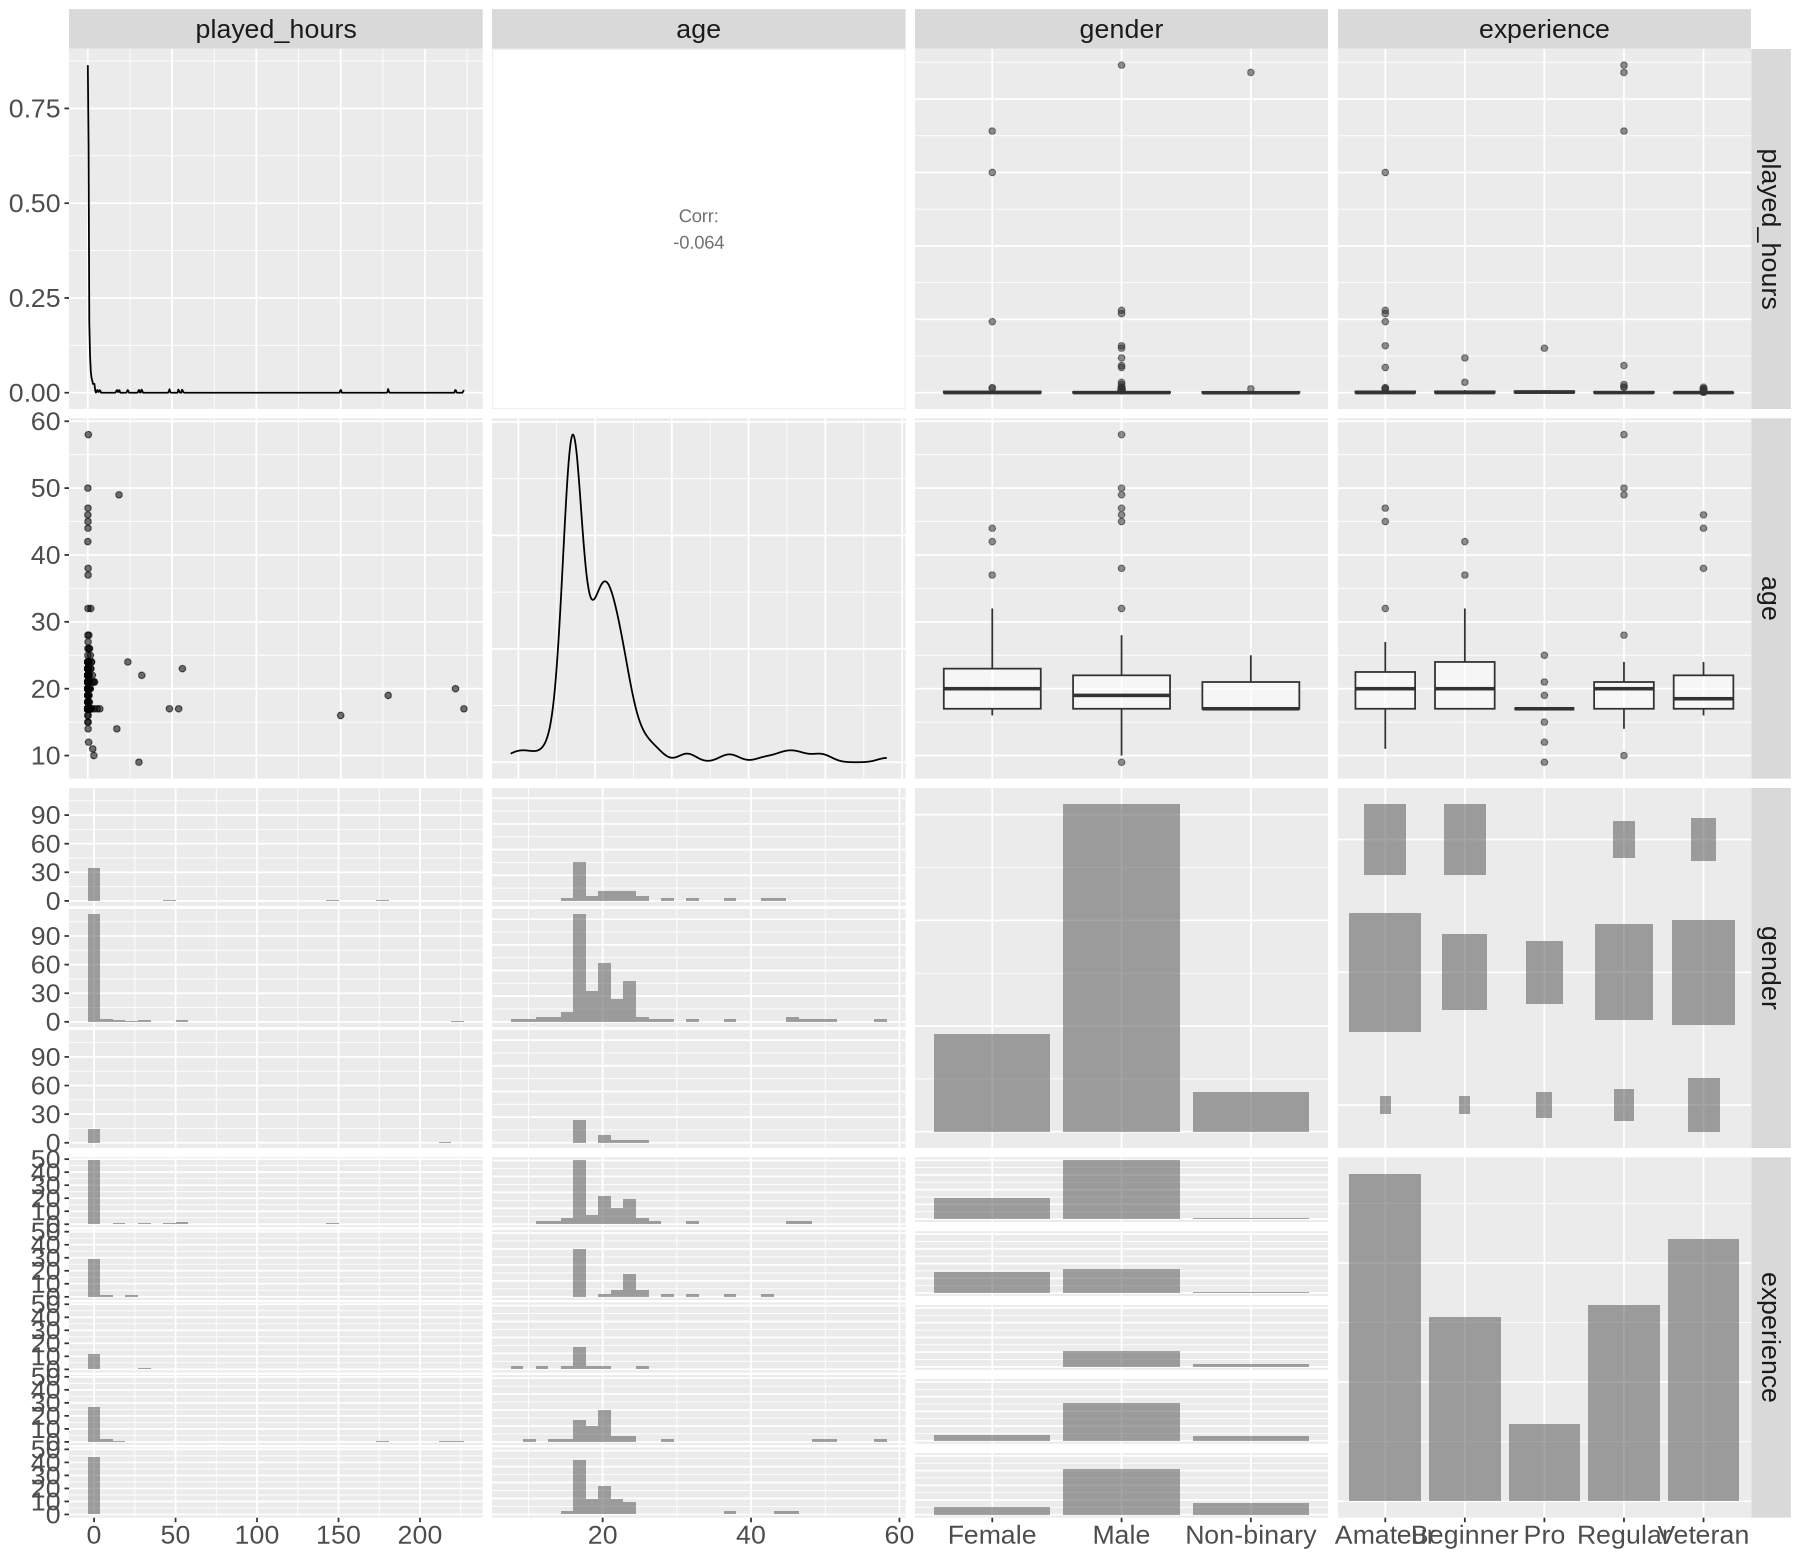

In [105]:
options(repr.plot.width = 15, repr.plot.height = 13)
players_pairplot <- players_wrangled |> 
     ggpairs(mapping = aes(alpha = 0.4)) +
     theme(text = element_text(size = 20))
players_pairplot

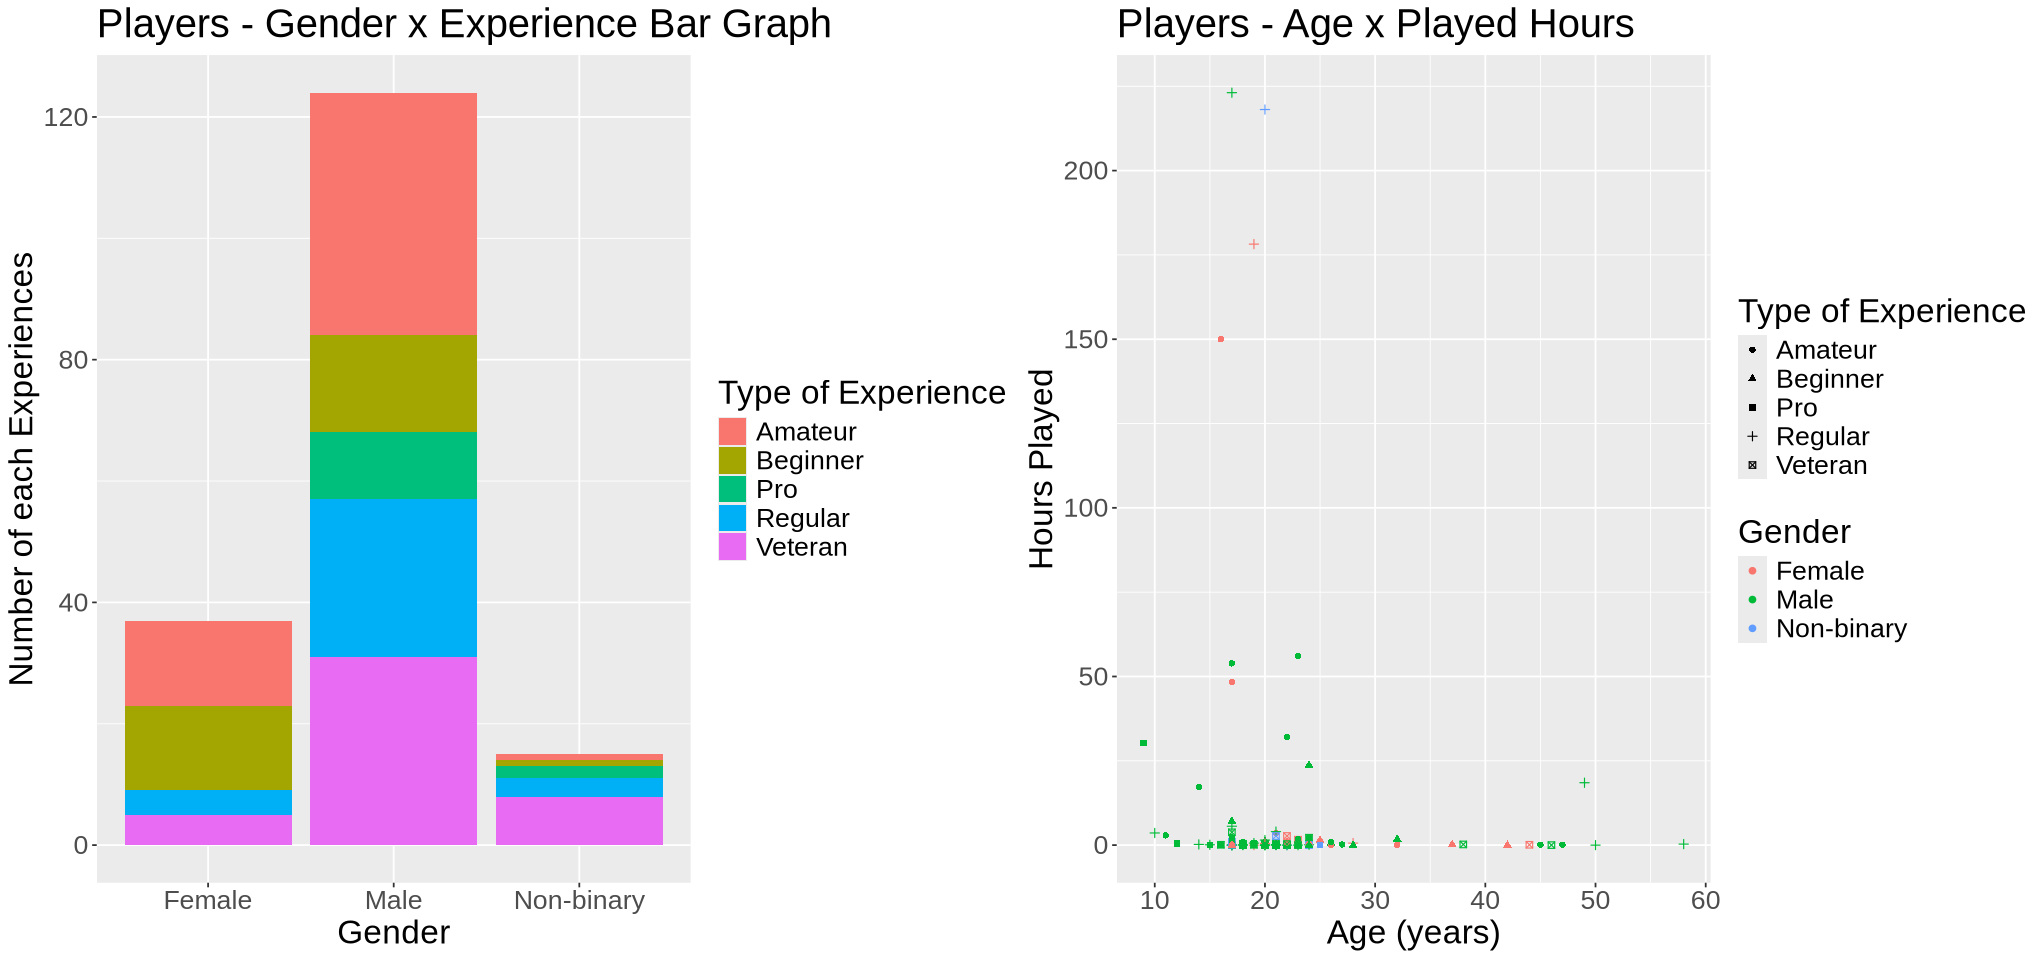

In [106]:
options(repr.plot.width = 17, repr.plot.height = 8)
all_predictors_plot <- players_wrangled |>
    ggplot(aes(x=age, y=played_hours, color=gender, shape=experience)) +
    geom_point() +
    labs(x="Age (years)", y="Hours Played", color="Gender", shape="Type of Experience", title="Players - Age x Played Hours") +
    theme(text = element_text(size=20))
gndr_exp_bar <- players_wrangled |>
    ggplot(aes(x=gender, fill=experience)) +
    geom_bar() +
    labs(x="Gender", y="Number of each Experiences", fill="Type of Experience", title="Players - Gender x Experience Bar Graph") +
    theme(text = element_text(size = 20))

plot_grid(gndr_exp_bar, all_predictors_plot)


#### Observations
- 8 of 12 players with more than 15 hours played are male
  - could signal that males tend to play for longer than other genders
- 7 of those 12 are amateurs
  - could signal amateurs play more than other experience levels
- zero "pro" females

## Methods and Plan
- Use KNN Regression to predict played_hours
- Don't need data from the sessions set, so only wrangled players set

- Appropriate method?
  - non-linear relation, so linear regression not used
- No assumptions required
- Weaknesses:
  - Large number of people logging 0 hours played causes any prediction to be small
  - 
- Comparing and selecting model
  - Cross-validation (5-fold) on training set
  - Select best k based on RMSE from folds
  - If unhappy with result, compare kNN model to other models (linear regression)
- Proccessing the data:
  - Split the data into training (70%) and testing (30%)
  - Standardize age and played_hours to prevent domination in distance calculation.
  - as.factor experience and gender
  - Fit kNN regression to training set using tuned k
  - Evaluate final model on test set using RMSE
